In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary Prediction of Data Professions.csv')

**EXPLORATORY DATA ANALYSIS**

In [3]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
df.tail()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1
2638,GREGORY,ABARCA,M,9-18-2014,01-07-2016,Analyst,24.0,49176,Marketing,17.0,13.0,2.0,2


In [5]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [6]:
df.shape

(2639, 13)

**DATA PRE-PROCESSING**

In [7]:
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [8]:
#Dropping columns which have least significance in model deployment
df.drop(['FIRST NAME','LAST NAME'],axis=1,inplace=True)

In [9]:
df['AGE']=df['AGE'].fillna(df['AGE'].mean())
df['RATINGS']=df['RATINGS'].fillna(df['RATINGS'].mean())

In [10]:
#It is seen that the total number of leaves is 30.
df['LEAVES USED']=df['LEAVES USED'].fillna(30-df['LEAVES REMAINING'].mean())
df['LEAVES REMAINING']=df['LEAVES REMAINING'].fillna(30-df['LEAVES USED'].mean())

In [11]:
df['DOJ']=df['DOJ'].fillna(df.sample(1)['DOJ'].values[0])

In [12]:
df.drop(['LEAVES REMAINING'],axis=1,inplace=True)

In [13]:
df.isna().sum()

SEX             0
DOJ             0
CURRENT DATE    0
DESIGNATION     0
AGE             0
SALARY          0
UNIT            0
LEAVES USED     0
RATINGS         0
PAST EXP        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEX           2639 non-null   object 
 1   DOJ           2639 non-null   object 
 2   CURRENT DATE  2639 non-null   object 
 3   DESIGNATION   2639 non-null   object 
 4   AGE           2639 non-null   float64
 5   SALARY        2639 non-null   int64  
 6   UNIT          2639 non-null   object 
 7   LEAVES USED   2639 non-null   float64
 8   RATINGS       2639 non-null   float64
 9   PAST EXP      2639 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 206.3+ KB


In [15]:
df['CURRENT DATE']=pd.to_datetime(df['CURRENT DATE'], errors='coerce')
df['DOJ']=pd.to_datetime(df['DOJ'], errors='coerce')
df['YEARS IN OFFICE']=((df['CURRENT DATE']-df['DOJ']).dt.days/365.25).round(1)

In [16]:
df.drop(['CURRENT DATE','DOJ'],axis=1,inplace=True)

In [17]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YEARS IN OFFICE
0,F,Analyst,21.000000,44570,Finance,24.000000,2.000000,0,1.6
1,F,Associate,24.756449,89207,Web,22.496777,3.486159,7,3.5
2,F,Analyst,21.000000,40955,Finance,23.000000,3.000000,0,1.4
3,F,Analyst,22.000000,45550,IT,22.000000,3.000000,0,2.8
4,M,Analyst,24.756449,43161,Operations,27.000000,3.486159,3,1.1


**FEATURE ENGINEERING**

In [18]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
num_features

['AGE', 'SALARY', 'LEAVES USED', 'RATINGS', 'PAST EXP', 'YEARS IN OFFICE']

In [19]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
cat_features

['SEX', 'DESIGNATION', 'UNIT']

In [20]:
df.duplicated().sum()

161

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

**DATA VISUALIZATION**

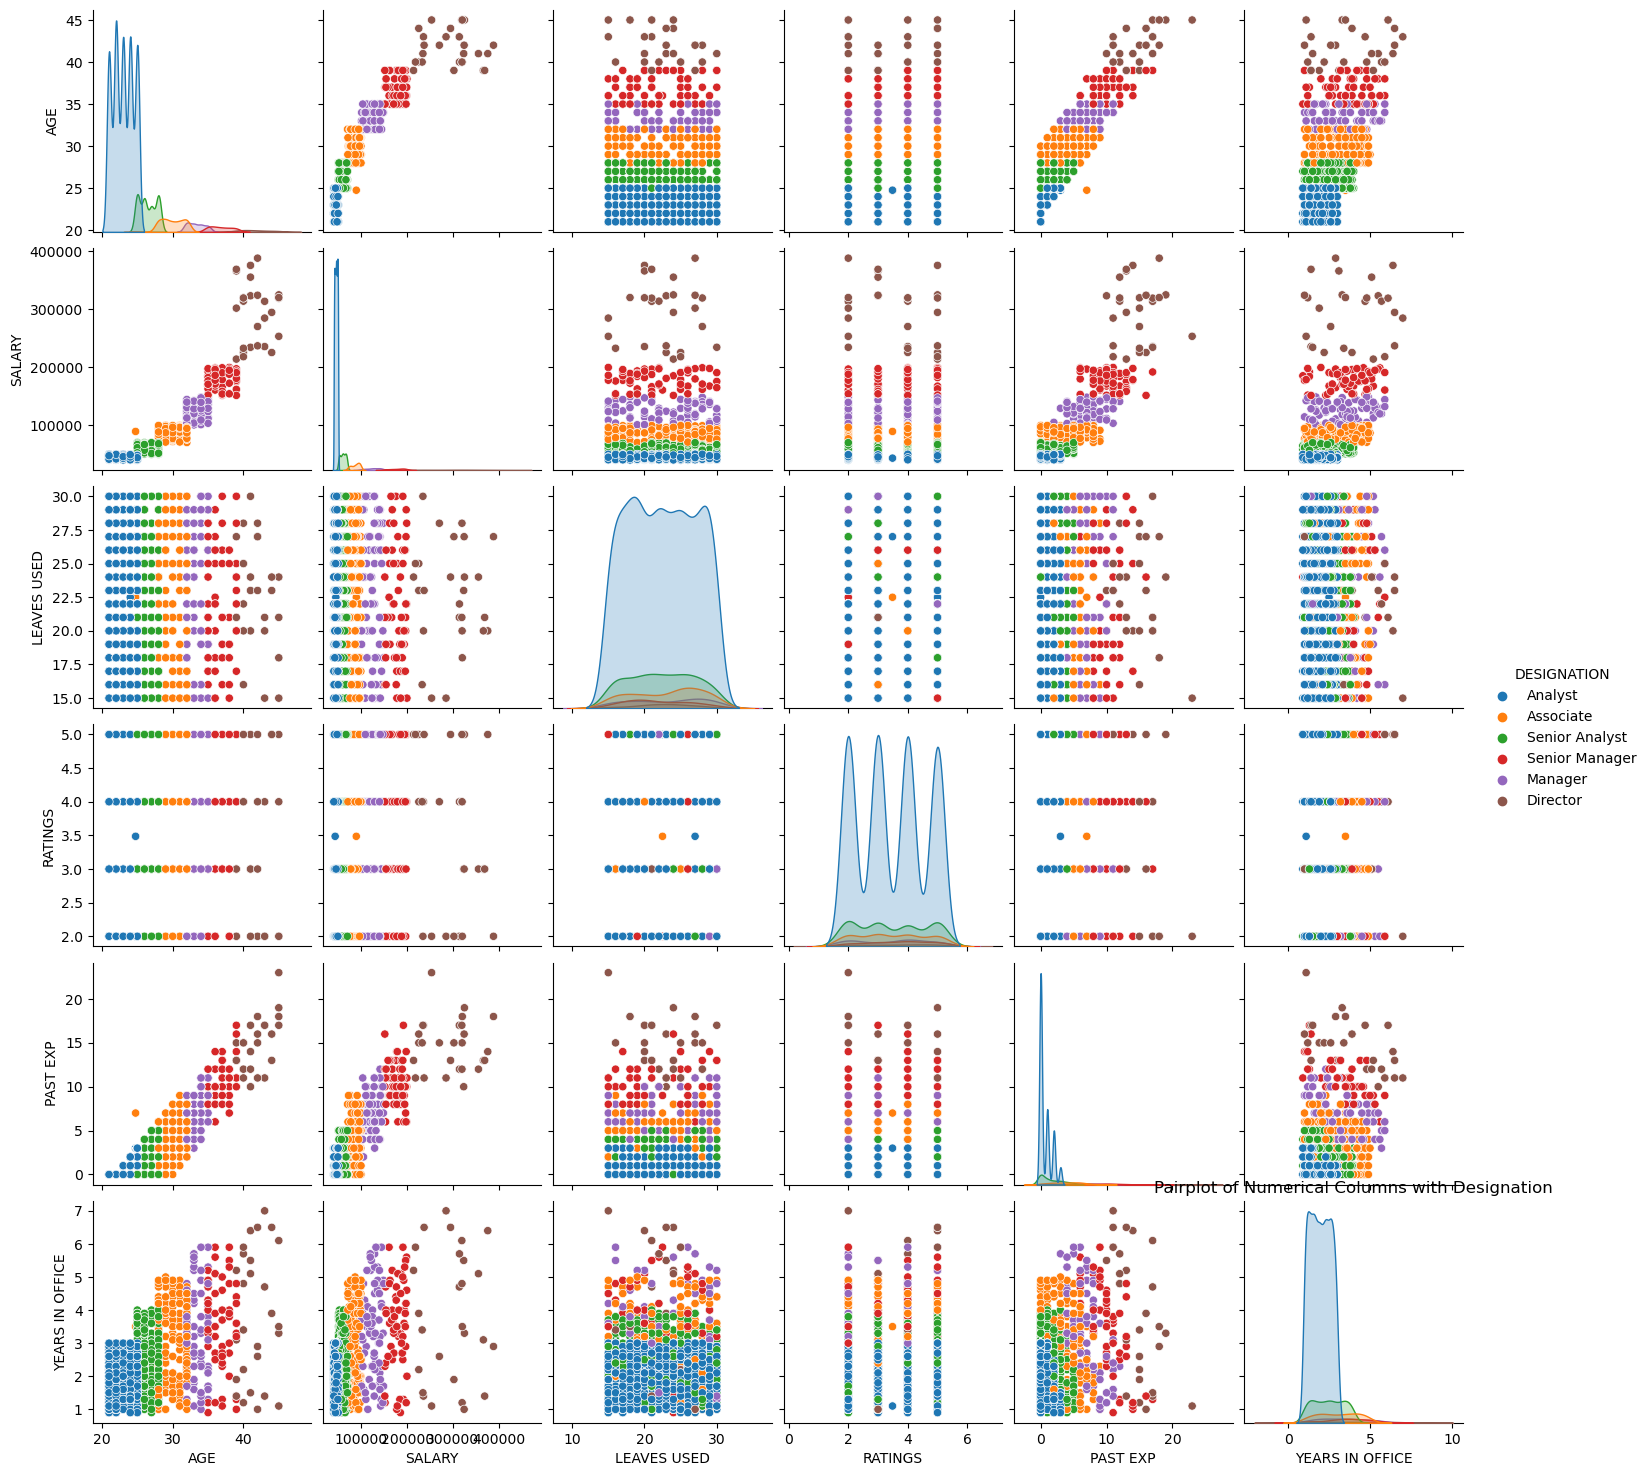

In [23]:
##Plotting Numerical Columns with Designation
sns.pairplot(df, hue='DESIGNATION', diag_kind='kde')
plt.title('Pairplot of Numerical Columns with Designation')
plt.show()

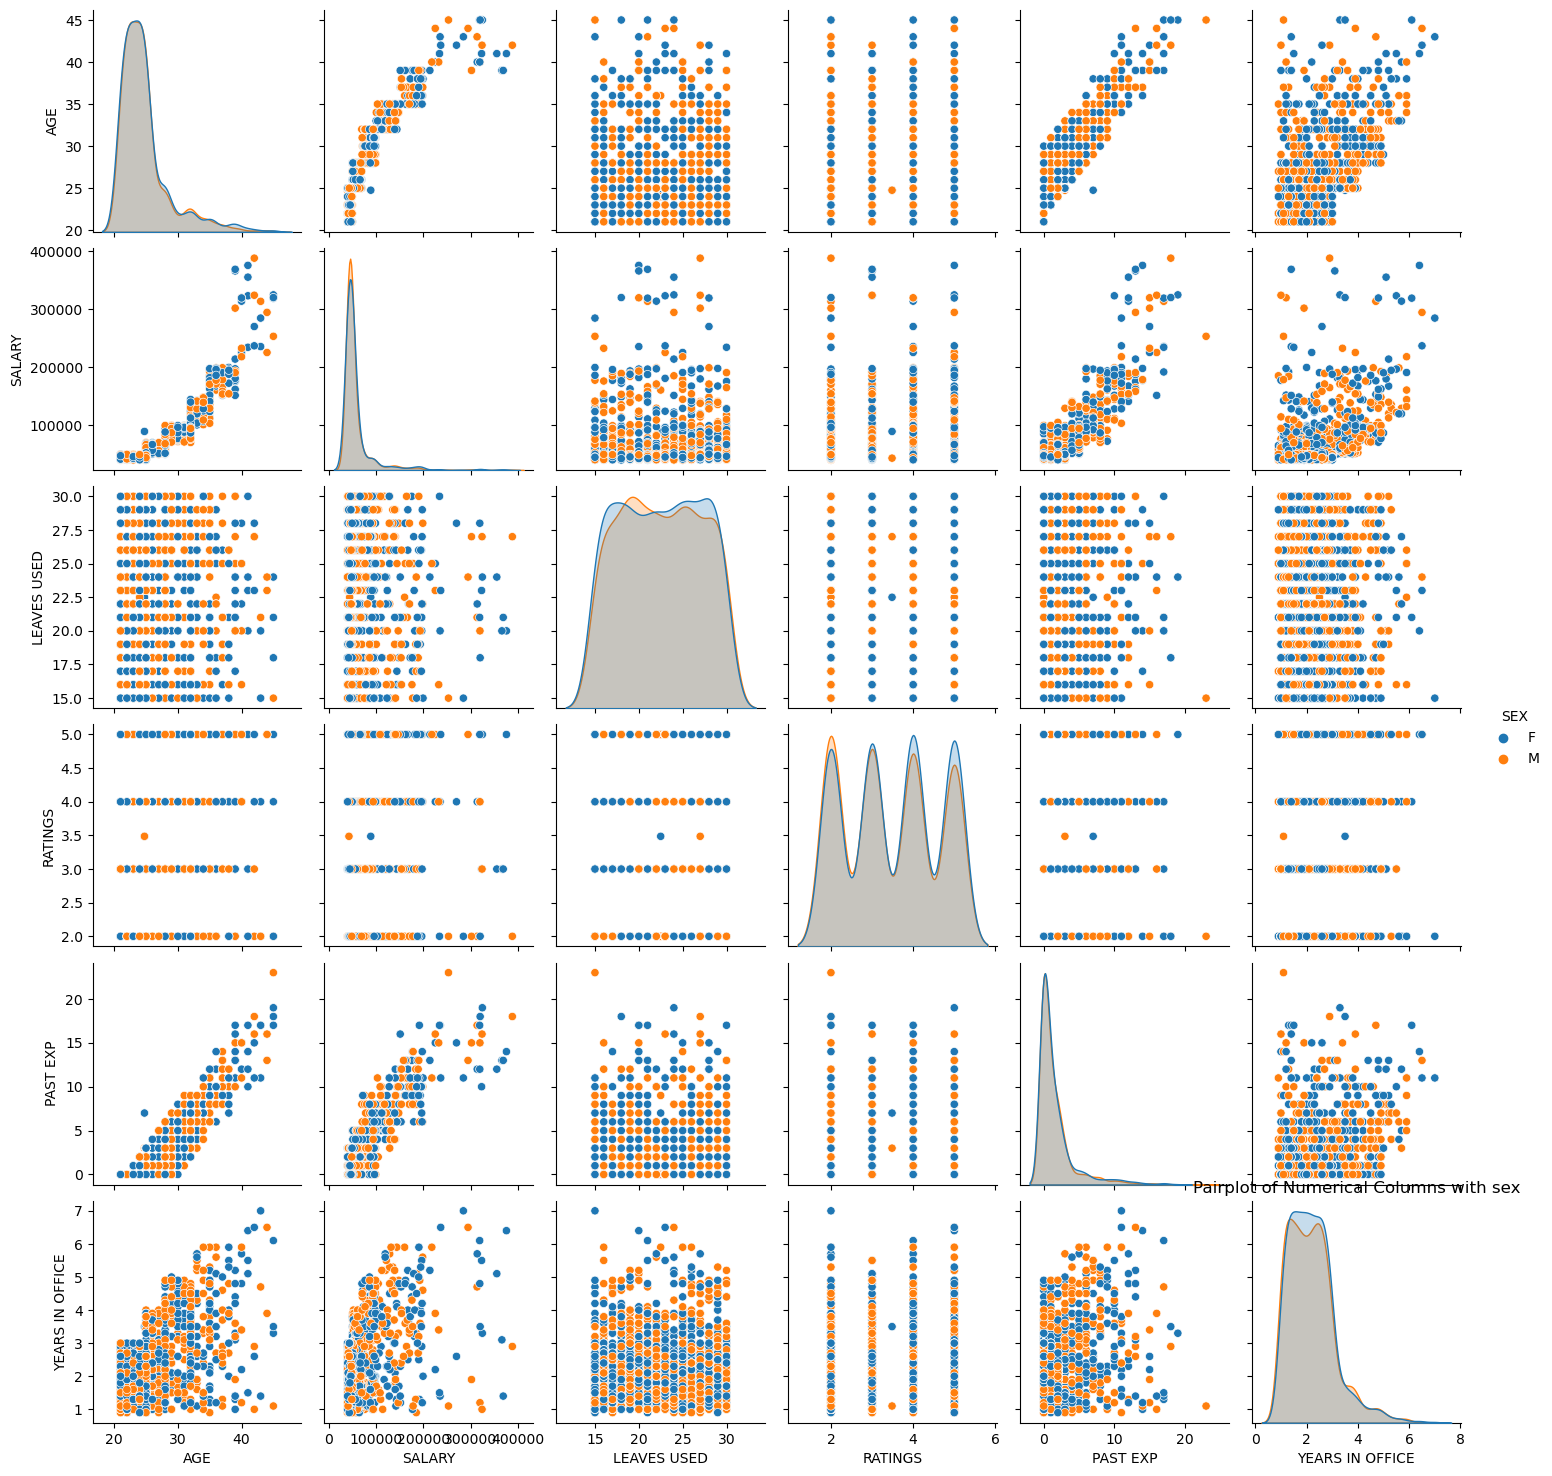

In [24]:
##Pairplot of Numerical Columns with Sex
sns.pairplot(df, hue='SEX', diag_kind='kde')
plt.title('Pairplot of Numerical Columns with sex')
plt.show()

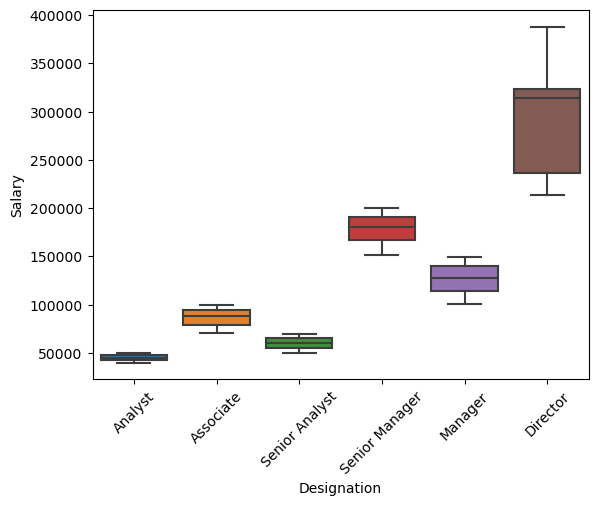

In [25]:
sns.boxplot(data=df,x="DESIGNATION",y="SALARY")
plt.xlabel("Designation")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

**ML MODEL DEVELOPMENT AND MODEL EVALUATION**

In [26]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [28]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YEARS IN OFFICE
0,F,Analyst,21.000000,44570,Finance,24.000000,2.000000,0,1.6
1,F,Associate,24.756449,89207,Web,22.496777,3.486159,7,3.5
2,F,Analyst,21.000000,40955,Finance,23.000000,3.000000,0,1.4
3,F,Analyst,22.000000,45550,IT,22.000000,3.000000,0,2.8
4,M,Analyst,24.756449,43161,Operations,27.000000,3.486159,3,1.1


In [29]:
X=df.drop(columns=['SALARY'],axis=1)
x_cols=X.columns

In [30]:
X.head()

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,RATINGS,PAST EXP,YEARS IN OFFICE
0,F,Analyst,21.000000,Finance,24.000000,2.000000,0,1.6
1,F,Associate,24.756449,Web,22.496777,3.486159,7,3.5
2,F,Analyst,21.000000,Finance,23.000000,3.000000,0,1.4
3,F,Analyst,22.000000,IT,22.000000,3.000000,0,2.8
4,M,Analyst,24.756449,Operations,27.000000,3.486159,3,1.1


In [31]:
y=df['SALARY']
y.head()

0    44570
1    89207
2    40955
3    45550
4    43161
Name: SALARY, dtype: int64

In [32]:
num_vals=X.select_dtypes(exclude="object").columns
num_vals

Index(['AGE', 'LEAVES USED', 'RATINGS', 'PAST EXP', 'YEARS IN OFFICE'], dtype='object')

In [33]:
cat_vals=X.select_dtypes(include="object").columns
cat_vals

Index(['SEX', 'DESIGNATION', 'UNIT'], dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
    ("StandardScaler",numeric_transformer,num_vals),
    ("OneHotEncoder",oh_transformer,cat_vals)
    ]
)

In [35]:
X_mod=preprocessor.fit_transform(X)

In [36]:
X_mod

array([[-9.53414145e-01,  3.27797330e-01, -1.32867754e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.45405301e-03,  6.60615015e-04,  3.88202533e-03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-9.53414145e-01,  1.10173839e-01, -4.32030546e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.53414145e-01,  1.41591479e+00,  1.36126345e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.86039301e-01,  1.10173839e-01, -4.32030546e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.86039301e-01, -1.19556711e+00, -1.32867754e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [37]:
#Dataset Split into Train and Test Datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_mod,y,test_size=0.25,random_state=42)
X_train,X_test,y_train,y_test

(array([[ 0.83712716,  0.32779733, -1.32867754, ...,  0.        ,
          0.        ,  0.        ],
        [-0.69762253,  0.54542082,  0.46461645, ...,  0.        ,
          0.        ,  0.        ],
        [-0.1860393 , -0.97794362,  0.46461645, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.44183092, -0.76032012, -1.32867754, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.34871039, -0.97794362,  1.36126345, ...,  0.        ,
          0.        ,  0.        ],
        [-0.44183092,  1.63353828, -1.32867754, ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.32554393, -0.54269663, -0.43203055, ...,  0.        ,
          1.        ,  0.        ],
        [-0.1860393 ,  0.76304431,  0.46461645, ...,  0.        ,
          0.        ,  0.        ],
        [-0.95341415, -1.63081409,  0.46461645, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [-0.95341415, -1.4131906 , -0.43203055, ...,  

In [38]:
def model_evaluator(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [39]:
models={
   "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGB Regressor":XGBRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_square=model_evaluator(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_square=model_evaluator(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    print("----------------------------------------------------")
    model_list.append(list(models.keys())[i])
    
    print("Model performance of Training Set")
    print("Root Mean Square :{:.4f}".format(model_train_rmse))
    print("Mean Absolute Error :{:.4f}".format(model_train_mae))
    print("R2 Score :{:.4f}".format(model_train_r2_square))
    print("----------------------------------------------------")
    print("Model performance of Test Set")
    print("Root Mean Square :{:.4f}".format(model_test_rmse))
    print("Mean Absolute Error :{:.4f}".format(model_test_mae))
    print("R2 Score :{:.4f}".format(model_test_r2_square))
    
    r2_list.append(model_test_r2_square)
    
    print('='*45)
    print('\n')

Linear Regression
----------------------------------------------------
Model performance of Training Set
Root Mean Square :8243.8622
Mean Absolute Error :4357.2639
R2 Score :0.9562
----------------------------------------------------
Model performance of Test Set
Root Mean Square :4996.6022
Mean Absolute Error :3567.7708
R2 Score :0.9666


Lasso
----------------------------------------------------
Model performance of Training Set
Root Mean Square :8243.9218
Mean Absolute Error :4356.8937
R2 Score :0.9562
----------------------------------------------------
Model performance of Test Set
Root Mean Square :4997.0624
Mean Absolute Error :3568.9019
R2 Score :0.9666


Ridge
----------------------------------------------------
Model performance of Training Set
Root Mean Square :8361.5535
Mean Absolute Error :4461.8547
R2 Score :0.9549
----------------------------------------------------
Model performance of Test Set
Root Mean Square :5191.7400
Mean Absolute Error :3744.9344
R2 Score :0.9640


111:	learn: 6129.0793752	total: 393ms	remaining: 3.12s
112:	learn: 6106.6882358	total: 397ms	remaining: 3.11s
113:	learn: 6080.3191230	total: 399ms	remaining: 3.1s
114:	learn: 6058.5246258	total: 402ms	remaining: 3.09s
115:	learn: 6040.8600277	total: 405ms	remaining: 3.08s
116:	learn: 6022.6320696	total: 409ms	remaining: 3.08s
117:	learn: 5999.9845358	total: 412ms	remaining: 3.08s
118:	learn: 5981.3037604	total: 416ms	remaining: 3.08s
119:	learn: 5964.1376784	total: 421ms	remaining: 3.09s
120:	learn: 5957.6505054	total: 424ms	remaining: 3.08s
121:	learn: 5934.0137694	total: 425ms	remaining: 3.06s
122:	learn: 5912.0898090	total: 427ms	remaining: 3.05s
123:	learn: 5891.3843092	total: 429ms	remaining: 3.03s
124:	learn: 5873.4929823	total: 431ms	remaining: 3.02s
125:	learn: 5862.1348911	total: 433ms	remaining: 3s
126:	learn: 5841.3752997	total: 435ms	remaining: 2.99s
127:	learn: 5824.5451819	total: 438ms	remaining: 2.98s
128:	learn: 5816.1443205	total: 439ms	remaining: 2.97s
129:	learn: 57

294:	learn: 4582.6115758	total: 756ms	remaining: 1.8s
295:	learn: 4582.1194260	total: 758ms	remaining: 1.8s
296:	learn: 4581.6413295	total: 760ms	remaining: 1.8s
297:	learn: 4574.5311141	total: 762ms	remaining: 1.79s
298:	learn: 4565.3601991	total: 764ms	remaining: 1.79s
299:	learn: 4564.6894987	total: 766ms	remaining: 1.79s
300:	learn: 4556.2409694	total: 769ms	remaining: 1.78s
301:	learn: 4555.7940734	total: 771ms	remaining: 1.78s
302:	learn: 4555.1601371	total: 772ms	remaining: 1.78s
303:	learn: 4554.5444319	total: 774ms	remaining: 1.77s
304:	learn: 4553.9463800	total: 776ms	remaining: 1.77s
305:	learn: 4547.7551809	total: 778ms	remaining: 1.76s
306:	learn: 4547.1771926	total: 780ms	remaining: 1.76s
307:	learn: 4546.4781753	total: 782ms	remaining: 1.76s
308:	learn: 4534.0486018	total: 784ms	remaining: 1.75s
309:	learn: 4533.5131872	total: 785ms	remaining: 1.75s
310:	learn: 4533.0776237	total: 787ms	remaining: 1.74s
311:	learn: 4532.5675324	total: 789ms	remaining: 1.74s
312:	learn: 4

484:	learn: 3797.5052383	total: 1.12s	remaining: 1.19s
485:	learn: 3793.7621929	total: 1.12s	remaining: 1.19s
486:	learn: 3788.1186124	total: 1.12s	remaining: 1.18s
487:	learn: 3785.5130647	total: 1.13s	remaining: 1.18s
488:	learn: 3783.4504401	total: 1.13s	remaining: 1.18s
489:	learn: 3780.5439477	total: 1.13s	remaining: 1.18s
490:	learn: 3776.6813571	total: 1.13s	remaining: 1.17s
491:	learn: 3770.8611112	total: 1.13s	remaining: 1.17s
492:	learn: 3770.6012319	total: 1.14s	remaining: 1.17s
493:	learn: 3767.7521922	total: 1.14s	remaining: 1.17s
494:	learn: 3765.1300791	total: 1.14s	remaining: 1.16s
495:	learn: 3763.6942774	total: 1.14s	remaining: 1.16s
496:	learn: 3758.8955111	total: 1.14s	remaining: 1.16s
497:	learn: 3755.0060654	total: 1.15s	remaining: 1.15s
498:	learn: 3750.0584711	total: 1.15s	remaining: 1.15s
499:	learn: 3748.5716111	total: 1.15s	remaining: 1.15s
500:	learn: 3746.1465205	total: 1.15s	remaining: 1.15s
501:	learn: 3740.9572081	total: 1.15s	remaining: 1.14s
502:	learn

678:	learn: 3262.2257788	total: 1.5s	remaining: 707ms
679:	learn: 3260.0024664	total: 1.5s	remaining: 705ms
680:	learn: 3259.9358448	total: 1.5s	remaining: 703ms
681:	learn: 3257.6802985	total: 1.5s	remaining: 700ms
682:	learn: 3254.6714746	total: 1.5s	remaining: 698ms
683:	learn: 3250.9668565	total: 1.5s	remaining: 696ms
684:	learn: 3249.1445151	total: 1.51s	remaining: 694ms
685:	learn: 3245.4645897	total: 1.51s	remaining: 691ms
686:	learn: 3242.9800463	total: 1.51s	remaining: 689ms
687:	learn: 3240.6567893	total: 1.51s	remaining: 687ms
688:	learn: 3238.2846837	total: 1.52s	remaining: 685ms
689:	learn: 3235.7645693	total: 1.52s	remaining: 683ms
690:	learn: 3233.4671968	total: 1.52s	remaining: 680ms
691:	learn: 3232.3846616	total: 1.52s	remaining: 678ms
692:	learn: 3229.5487854	total: 1.52s	remaining: 676ms
693:	learn: 3228.2796391	total: 1.53s	remaining: 673ms
694:	learn: 3224.7158002	total: 1.53s	remaining: 671ms
695:	learn: 3223.6468837	total: 1.53s	remaining: 669ms
696:	learn: 3219

871:	learn: 2941.1964970	total: 1.87s	remaining: 275ms
872:	learn: 2939.7554240	total: 1.87s	remaining: 272ms
873:	learn: 2938.5074538	total: 1.88s	remaining: 270ms
874:	learn: 2937.3752169	total: 1.88s	remaining: 268ms
875:	learn: 2935.9556862	total: 1.88s	remaining: 266ms
876:	learn: 2934.4640688	total: 1.88s	remaining: 264ms
877:	learn: 2933.7151957	total: 1.88s	remaining: 262ms
878:	learn: 2932.3830995	total: 1.88s	remaining: 259ms
879:	learn: 2931.7870557	total: 1.89s	remaining: 257ms
880:	learn: 2929.2481235	total: 1.89s	remaining: 255ms
881:	learn: 2926.7348414	total: 1.89s	remaining: 253ms
882:	learn: 2924.9091210	total: 1.89s	remaining: 251ms
883:	learn: 2923.1762171	total: 1.89s	remaining: 249ms
884:	learn: 2922.4016570	total: 1.9s	remaining: 246ms
885:	learn: 2921.1743594	total: 1.9s	remaining: 244ms
886:	learn: 2919.6904961	total: 1.9s	remaining: 242ms
887:	learn: 2919.3428790	total: 1.91s	remaining: 240ms
888:	learn: 2918.6905867	total: 1.91s	remaining: 238ms
889:	learn: 2

In [40]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.966620
1,Lasso,0.966614
2,Ridge,0.963962
5,Random Forest,0.953771
6,XGB Regressor,0.948693
7,Cat Boost Regressor,0.944492
8,Ada Boost Regressor,0.936656
3,K-Neighbors Regressor,0.935334
4,Decision Tree,0.921199


In [41]:
##Linear Regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 96.66


**RECOMMENDATION**

<Axes: xlabel='SALARY', ylabel='Density'>

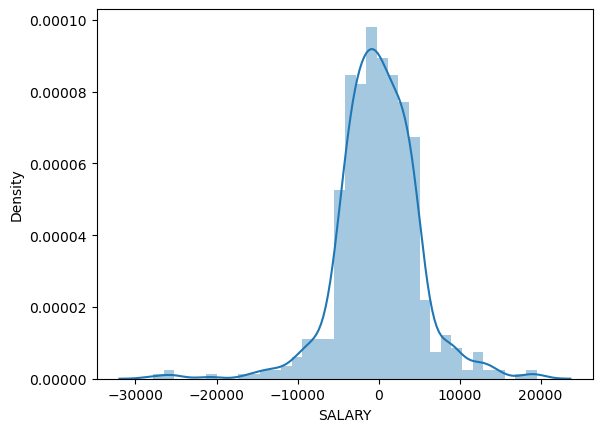

In [42]:
sns.distplot(y_test-y_pred)

In [43]:
##Lasso Regression
lasso_model=Lasso()
lasso_model=lasso_model.fit(X_train,y_train)
y_pred_lasso=lasso_model.predict(X_test)
score_lasso=r2_score(y_test,y_pred_lasso)*100
print("Accuracy of the model is %.2f"%score_lasso)

Accuracy of the model is 96.66


<Axes: xlabel='SALARY', ylabel='Density'>

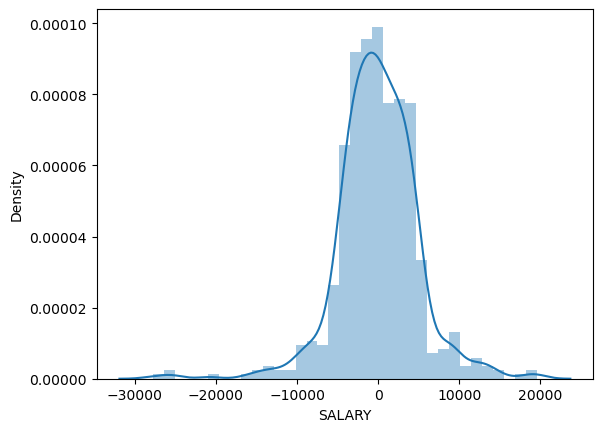

In [44]:
sns.distplot(y_test-y_pred_lasso)

In [45]:
##Dataframe showing difference between Actual and Predicted Values for Linear Regression
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1835,53535,59697.360799,-6162.360799
261,48981,45465.385834,3515.614166
2189,44281,45231.744815,-950.744815
1024,44478,44487.362553,-9.362553
56,40095,45250.842185,-5155.842185
...,...,...,...
2287,44366,45123.139014,-757.139014
1597,43748,45517.732382,-1769.732382
231,49393,44370.012324,5022.987676
1605,48295,43942.201359,4352.798641


In [46]:
##Dataframe showing difference between Actual and Predicted Values for Lasso Regression
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_lasso,'Difference':y_test-y_pred_lasso})
pred_df

,Actual Value,Predicted Value,Difference
1835,53535,59714.428561,-6179.428561
261,48981,45464.277240,3516.722760
2189,44281,45202.624583,-921.624583
1024,44478,44476.572412,1.427588
56,40095,45225.353342,-5130.353342
...,...,...,...
2287,44366,45161.665081,-795.665081
1597,43748,45522.548018,-1774.548018
231,49393,44339.899791,5053.100209
1605,48295,43939.700921,4355.299079


**From the distplot, accuracy scores and difference dataframe, we see that Lasso and Linear Regression perform considerably well with high accuracy scores and without overfitting**

In [47]:
import pickle
with open('sal_pred.pkl','wb') as f:
    pickle.dump(lin_model,f)

In [48]:
with open('preprocessor.pkl','wb') as f:
    pickle.dump(preprocessor,f)

In [49]:
import json
columns={
'data_columns':[col.lower() for col in x_cols]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))